# Task 1: Build a Random Forest Classifier

## Library

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import LogNorm

## Load Data

In [3]:
# Load Data
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

train_path = os.path.join(DATA_DIR, "sentiment_train.csv")
test_path = os.path.join(DATA_DIR, "sentiment_test.csv")

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [4]:
print("Training Data Shape:", train_data.shape)

Training Data Shape: (585, 14)


In [5]:
print("Testing Data Shape:", test_data.shape)

Testing Data Shape: (147, 14)


In [6]:
print("Training Data Preview:")
display(train_data.head())

Training Data Preview:


,Unnamed: 0.1,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,684,Reflecting on the challenges of the school yea...,Sad,2023-09-11 15:45:00,OverwhelmedHighSchoolStudent,Twitter,#SchoolChallenges #HighSchoolStruggles,15.0,28.0,USA,2023,9,11,15
1,251,"Standing tall, proud as an oak, the branches ...",Proud,2019-12-10 12:20:00,OakAchiever,Twitter,#Proud #BranchesOfAchievement,25.0,50.0,Canada,2019,12,10,12
2,337,Calmness found in the rhythm of raindrops on t...,Calmness,2017-11-08 21:20:00,RainWatcher,Twitter,#Calmness #RainyDays,18.0,35.0,Australia,2017,11,8,21
3,261,"Unveiling the layers of curiosity, a labyrint...",Curiosity,2020-11-29 14:45:00,KnowledgeSeeker,Instagram,#Curiosity #LabyrinthOfQuestions,17.0,34.0,USA,2020,11,29,14
4,440,"Heart in ruins, the remnants of shattered drea...",Ruins,2022-01-08 11:30:00,DreamsInWind,Twitter,#Ruins #ShatteredDreams,20.0,40.0,Brazil,2022,1,8,11


In [7]:
print("Testing Data Preview:")
display(test_data.head())

Testing Data Preview:


,Unnamed: 0.1,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,605,Exploring the world of digital art. It's never...,Curiosity,2023-06-13 14:45:00,ArtAdventurer,Facebook,#ArtDiscovery #SeniorArtist,22.0,45.0,Canada,2023,6,13,14
1,34,Feeling inspired after attending a workshop. ...,Positive,2023-01-26 09:45:00,WorkshopAttendee,Instagram,#Inspiration #Workshop,25.0,50.0,USA,2023,1,26,9
2,301,"Eyes wide open in the night, fearful shadows ...",Fearful,2022-05-12 02:00:00,NightPrisoner,Facebook,#Fearful #ImaginedHorrors,18.0,36.0,India,2022,5,12,2
3,458,"A soul weathered by the storm of heartbreak, s...",Heartbreak,2019-04-18 11:00:00,StormSeeker,Twitter,#Heartbreak #CalmAfterStorm,22.0,45.0,Brazil,2019,4,18,11
4,635,"Attended a wine tasting event, savoring the ri...",Joy,2023-07-13 20:00:00,SeniorWineConnoisseur,Instagram,#AgedToPerfection #SeniorCheers,35.0,70.0,UK,2023,7,13,20


## Preprocessing

In [8]:
drop_cols = ["Unnamed: 0.1", "Timestamp", "User", "Platform", "Hashtags", "Country"]
train_data.drop(columns=drop_cols, inplace=True, errors='ignore')
test_data.drop(columns=drop_cols, inplace=True, errors='ignore')

## Encode Sentiments

In [9]:
# Encoding Label
le = LabelEncoder()
le.fit(train_data["Sentiment"].unique())

train_data["Sentiment"] = le.transform(train_data["Sentiment"])

test_data = test_data[test_data["Sentiment"].isin(le.classes_)].copy()
test_data["Sentiment"] = le.transform(test_data["Sentiment"])

## Feature Extraction (TF-IDF)

In [10]:
# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(train_data["Text"])
X_test_tfidf = vectorizer.transform(test_data["Text"])

In [11]:
# Numerical Features
num_features = ["Retweets", "Likes", "Year", "Month", "Day", "Hour"]
X_train_num = train_data[num_features].values if set(num_features).issubset(train_data.columns) else np.zeros((train_data.shape[0], len(num_features)))
X_test_num = test_data[num_features].values if set(num_features).issubset(test_data.columns) else np.zeros((test_data.shape[0], len(num_features)))

In [12]:
# Combine Features
X_train = hstack([X_train_tfidf, X_train_num])
X_test = hstack([X_test_tfidf, X_test_num])
y_train = train_data["Sentiment"]
y_test = test_data["Sentiment"]

## Train Model

In [13]:
# Train Model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## Evaluation

In [14]:
# Evaluation
y_pred = rf.predict(X_test)
valid_labels = np.unique(y_test)
valid_names = [le.classes_[i] for i in valid_labels]
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, labels=valid_labels, target_names=valid_names))


🔹 Classification Report:
                   precision    recall  f1-score   support

    Acceptance          0.00      0.00      0.00         2
    Affection           0.00      0.00      0.00         1
 Ambivalence            1.00      1.00      1.00         1
    Anger               0.00      0.00      0.00         1
   Arousal              0.00      0.00      0.00         3
             Awe        0.00      0.00      0.00         1
    Awe                 0.00      0.00      0.00         1
             Bad        0.00      0.00      0.00         1
        Betrayal        0.00      0.00      0.00         2
    Bitter              0.00      0.00      0.00         1
      Bitterness        1.00      1.00      1.00         1
    Calmness            0.00      0.00      0.00         1
     Captivation        0.00      0.00      0.00         1
 Confusion              1.00      0.33      0.50         3
   Contemplation        0.00      0.00      0.00         1
     Contentment        0.00 

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Confusion Matrix

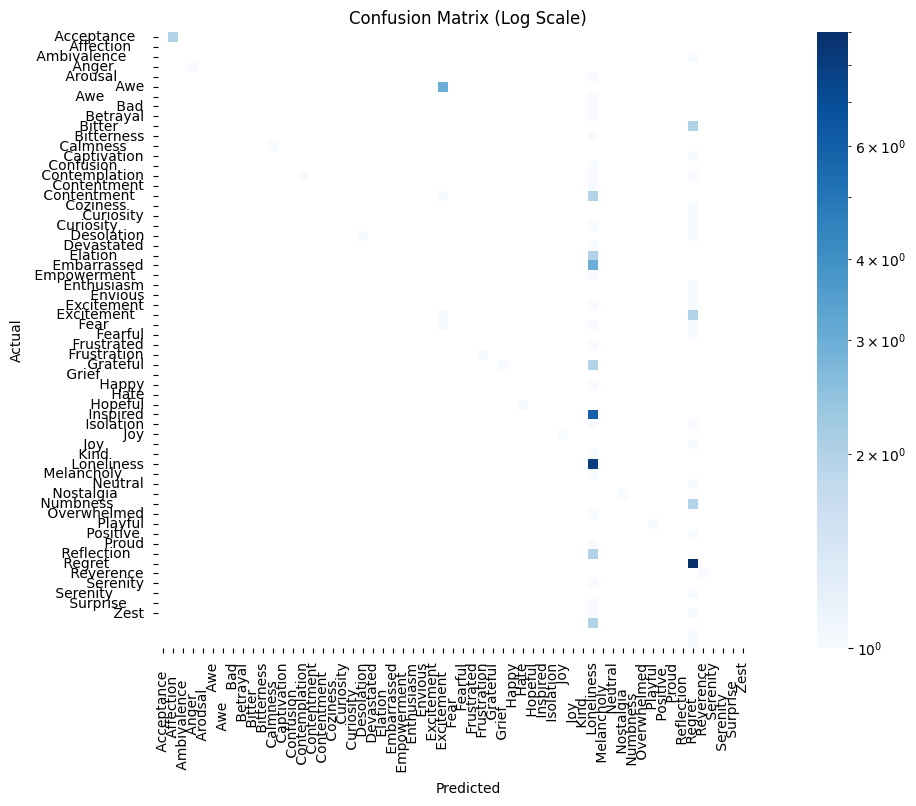

In [15]:
# # Confusion Matrix
# plt.figure(figsize=(6,4))
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

# # Normalized Confusion Matrix (Percentage)
# cm = confusion_matrix(y_test, y_pred, normalize='true')

# plt.figure(figsize=(10, 6))
# sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Normalized Confusion Matrix (Percentage)")
# plt.show()

# Confusion Matrix Visualization (Improved for Large Data)
c_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(c_matrix, annot=False, fmt="d", cmap="Blues", norm=LogNorm(), xticklabels=valid_names, yticklabels=valid_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Log Scale)")
plt.show()

## Feature Importance

In [16]:
# Feature Importance
feature_importance = rf.feature_importances_
feature_names = vectorizer.get_feature_names_out().tolist() + num_features
sorted_idx = np.argsort(feature_importance)[-10:]

## Visualization

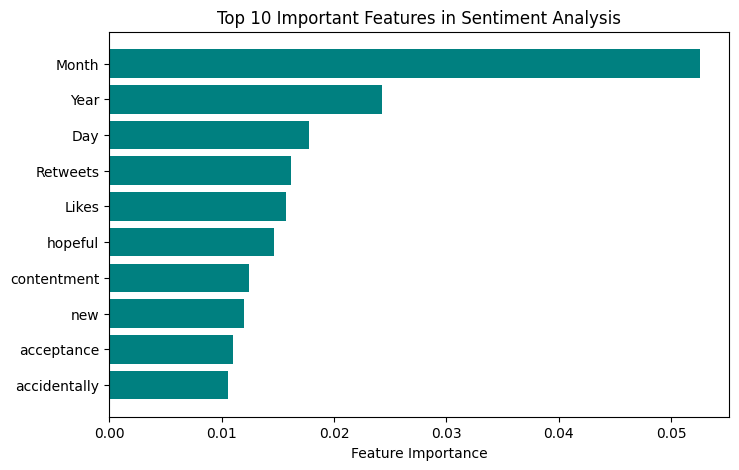

In [17]:
plt.figure(figsize=(8,5))
plt.barh([feature_names[i] for i in sorted_idx], feature_importance[sorted_idx], color="teal")
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features in Sentiment Analysis")
plt.show()

## Hyperparameter Tuning

In [18]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Final Model

In [19]:
best_rf = grid_search.best_estimator_
best_pred = best_rf.predict(X_test)

print("Final Model Classification Report:")
print(classification_report(y_test, best_pred))

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         3
          21       0.00      0.00      0.00         1
          23       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          26       0.00      0.00      0.00         2
          27       1.00      1.00      1.00         1
          28       1.00      1.00      1.00         1
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         1
          45       0.75      1.00      0.86   

c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{